## ML Project Steps: 

1. Take big view.
2. Get your data ready, explore your data.
3. Feature engineering for ML algorithms
4. Pick ML model and train it -- today we use simple linear model as example

### 1. Take big view

In [1]:
import numpy as np
import pandas as pd
import os
# to make this notebook's output identical at every run
np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

##### We load open-source data from SF MLS historical database.

In [2]:
df = pd.read_csv('Sales.csv')
df.head()

,longitude,latitude,elevation,full_address,city,state,street_no,street_name,street_suffix,zip,...,orig_list_price,sale_date,sale_price,rooms,baths,beds,lot_acres,lot_sf,year_built,num_parking
0,-122.50965,37.780280,200.83,"2645 El Camino Del Mar, San Francisco, CA 94121",San Francisco,CA,2645,El Camino Del Mar,NaN,94121,...,1095000,3/22/2013,1260000,8,3.5,4,NaN,0,1969,2
1,-122.50929,37.762608,23.21,"1278 La Playa St, San Francisco, CA 94122",San Francisco,CA,1278,La Playa,St,94122,...,1250000,4/25/2016,1075000,9,3.0,4,0.0689,3000,1947,1
2,-122.50929,37.762608,23.21,"1278 La Playa St, San Francisco, CA 94122",San Francisco,CA,1278,La Playa,St,94122,...,1395000,8/17/2017,1525000,9,5.0,5,0.0689,3000,1947,1
3,-122.50924,37.777330,189.11,"590 48th Ave, San Francisco, CA 94121",San Francisco,CA,590,48th,Ave,94121,...,725000,8/20/2010,715000,5,1.0,2,NaN,0,1939,2
4,-122.50919,37.776695,175.89,"618 48th Ave, San Francisco, CA 94121",San Francisco,CA,618,48th,Ave,94121,...,1595000,7/13/2012,1595000,8,4.0,4,NaN,0,1951,3


 Seems like we cannot see all the columns, so we need to do some tricks here:

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,longitude,latitude,elevation,full_address,city,state,street_no,street_name,street_suffix,zip,area,district_no,district_desc,subdist_no,subdist_desc,on_market_date,cdom,orig_list_price,sale_date,sale_price,rooms,baths,beds,lot_acres,lot_sf,year_built,num_parking
0,-122.50965,37.780280,200.83,"2645 El Camino Del Mar, San Francisco, CA 94121",San Francisco,CA,2645,El Camino Del Mar,NaN,94121,1050,1,SF District 1,1050,1 - Outer Richmond,3/14/2013,4,1095000,3/22/2013,1260000,8,3.5,4,NaN,0,1969,2
1,-122.50929,37.762608,23.21,"1278 La Playa St, San Francisco, CA 94122",San Francisco,CA,1278,La Playa,St,94122,2030,2,SF District 2,2030,2 - Outer Sunset,12/3/2015,144,1250000,4/25/2016,1075000,9,3.0,4,0.0689,3000,1947,1
2,-122.50929,37.762608,23.21,"1278 La Playa St, San Francisco, CA 94122",San Francisco,CA,1278,La Playa,St,94122,2030,2,SF District 2,2030,2 - Outer Sunset,5/18/2017,36,1395000,8/17/2017,1525000,9,5.0,5,0.0689,3000,1947,1
3,-122.50924,37.777330,189.11,"590 48th Ave, San Francisco, CA 94121",San Francisco,CA,590,48th,Ave,94121,1050,1,SF District 1,1050,1 - Outer Richmond,6/27/2010,42,725000,8/20/2010,715000,5,1.0,2,NaN,0,1939,2
4,-122.50919,37.776695,175.89,"618 48th Ave, San Francisco, CA 94121",San Francisco,CA,618,48th,Ave,94121,1050,1,SF District 1,1050,1 - Outer Richmond,6/7/2012,24,1595000,7/13/2012,1595000,8,4.0,4,NaN,0,1951,3


In [4]:
## There are total 39 attributes
len(df.columns)

27

In [5]:
df.columns

Index(['longitude', 'latitude', 'elevation', 'full_address', 'city', 'state',
       'street_no', 'street_name', 'street_suffix', 'zip', 'area',
       'district_no', 'district_desc', 'subdist_no', 'subdist_desc',
       'on_market_date', 'cdom', 'orig_list_price', 'sale_date', 'sale_price',
       'rooms', 'baths', 'beds', 'lot_acres', 'lot_sf', 'year_built',
       'num_parking'],
      dtype='object')

All the records are from California

In [6]:
df['state'].unique()

array(['CA'], dtype=object)

Further, all the records are from San Francisco

In [7]:
df['city'].unique()

array(['San Francisco'], dtype=object)

In [8]:
## summary of the housing data : columns and basic statistics
## Each row represents one district
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23711 entries, 0 to 23710
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   longitude        23242 non-null  float64
 1   latitude         23242 non-null  float64
 2   elevation        23242 non-null  float64
 3   full_address     23711 non-null  object 
 4   city             23711 non-null  object 
 5   state            23711 non-null  object 
 6   street_no        23711 non-null  int64  
 7   street_name      23711 non-null  object 
 8   street_suffix    22098 non-null  object 
 9   zip              23711 non-null  int64  
 10  area             23711 non-null  int64  
 11  district_no      23711 non-null  int64  
 12  district_desc    23711 non-null  object 
 13  subdist_no       23711 non-null  int64  
 14  subdist_desc     23711 non-null  object 
 15  on_market_date   23711 non-null  object 
 16  cdom             23711 non-null  int64  
 17  orig_list_pr

In [9]:
df.describe()

,longitude,latitude,elevation,street_no,zip,area,district_no,subdist_no,cdom,orig_list_price,sale_price,rooms,baths,beds,lot_acres,lot_sf,year_built,num_parking
count,23242.000000,23242.000000,23242.000000,23711.000000,23711.000000,23711.000000,23711.000000,23711.000000,23711.000000,2.371100e+04,2.371100e+04,23711.000000,23711.000000,23711.000000,10332.000000,23711.000000,23711.000000,23711.000000
mean,-122.447325,37.745273,249.562446,1001.928936,94120.321412,5581.341993,5.535321,5581.341993,43.288685,1.791031e+06,1.371454e+06,4.463203,2.079636,3.006664,0.858479,1242.486061,1817.956392,1.497533
std,0.031239,0.022504,152.766784,1088.454442,43.495644,3246.142173,3.251098,3246.142173,55.594501,1.836568e+07,1.298631e+06,3.375162,1.088199,1.084513,47.421977,1599.570446,457.579238,0.775076
min,-122.509650,37.707893,8.370000,1.000000,91107.000000,1010.000000,1.000000,1010.000000,0.000000,1.000000e+00,1.050000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-122.470070,37.729390,138.140000,164.000000,94112.000000,2070.000000,2.000000,2070.000000,13.000000,6.811110e+05,7.030000e+05,0.000000,1.000000,2.000000,0.054500,0.000000,1911.000000,1.000000
50%,-122.445050,37.741936,227.700000,549.000000,94118.000000,5030.000000,5.000000,5030.000000,27.000000,8.990000e+05,1.008000e+06,5.000000,2.000000,3.000000,0.060800,0.000000,1927.000000,1.000000
75%,-122.425722,37.757972,329.685000,1619.000000,94127.000000,9020.000000,9.000000,9020.000000,51.000000,1.450000e+06,1.588000e+06,7.000000,2.500000,4.000000,0.069200,2500.000000,1946.000000,2.000000
max,-122.370895,37.806440,825.500000,8332.000000,97124.000000,10120.000000,10.000000,10120.000000,2054.000000,9.950000e+08,3.200000e+07,30.000000,14.000000,40.000000,3283.000000,28788.000000,2018.000000,7.000000


##### Let's revisit this dataset:

In [10]:
df.head()

,longitude,latitude,elevation,full_address,city,state,street_no,street_name,street_suffix,zip,area,district_no,district_desc,subdist_no,subdist_desc,on_market_date,cdom,orig_list_price,sale_date,sale_price,rooms,baths,beds,lot_acres,lot_sf,year_built,num_parking
0,-122.50965,37.780280,200.83,"2645 El Camino Del Mar, San Francisco, CA 94121",San Francisco,CA,2645,El Camino Del Mar,NaN,94121,1050,1,SF District 1,1050,1 - Outer Richmond,3/14/2013,4,1095000,3/22/2013,1260000,8,3.5,4,NaN,0,1969,2
1,-122.50929,37.762608,23.21,"1278 La Playa St, San Francisco, CA 94122",San Francisco,CA,1278,La Playa,St,94122,2030,2,SF District 2,2030,2 - Outer Sunset,12/3/2015,144,1250000,4/25/2016,1075000,9,3.0,4,0.0689,3000,1947,1
2,-122.50929,37.762608,23.21,"1278 La Playa St, San Francisco, CA 94122",San Francisco,CA,1278,La Playa,St,94122,2030,2,SF District 2,2030,2 - Outer Sunset,5/18/2017,36,1395000,8/17/2017,1525000,9,5.0,5,0.0689,3000,1947,1
3,-122.50924,37.777330,189.11,"590 48th Ave, San Francisco, CA 94121",San Francisco,CA,590,48th,Ave,94121,1050,1,SF District 1,1050,1 - Outer Richmond,6/27/2010,42,725000,8/20/2010,715000,5,1.0,2,NaN,0,1939,2
4,-122.50919,37.776695,175.89,"618 48th Ave, San Francisco, CA 94121",San Francisco,CA,618,48th,Ave,94121,1050,1,SF District 1,1050,1 - Outer Richmond,6/7/2012,24,1595000,7/13/2012,1595000,8,4.0,4,NaN,0,1951,3


***We can have a look at each column:***

+ longitude, latitute and elevation : for precise location of the house
+ full_address: also detailed location, if we use google map or other mapping system, we could map the (longtitude, latitute, elevation) location to street and numbers

+ state and city: all records are from San Francisco, California

+ street no, street name, street suffix: supplemental information for full address

+ zip, area, district_no, district_desc: zip code, location and neighbourhood's name

+ on_market_date, cdom: listing date and cumulative days on market

Others are self-explanatory

##### Let's have a look at the whole data and distribution:

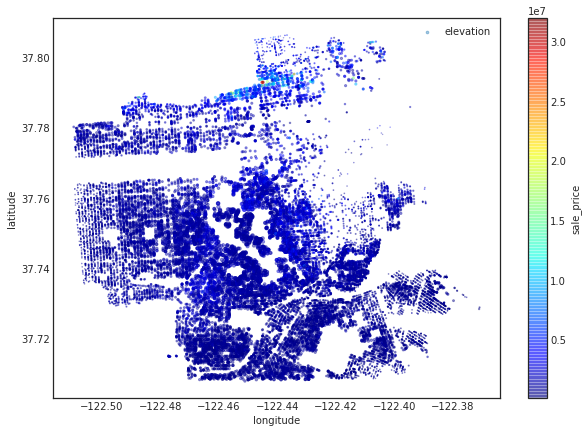

In [11]:
## Heatmap for median_income
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=df["elevation"]/60, label="elevation", figsize=(10,7),
    c="sale_price", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

### 2. Get data ready and explore data

We need to drop some data which is redundant and not needed in our analysis

In [12]:
df.columns

Index(['longitude', 'latitude', 'elevation', 'full_address', 'city', 'state',
       'street_no', 'street_name', 'street_suffix', 'zip', 'area',
       'district_no', 'district_desc', 'subdist_no', 'subdist_desc',
       'on_market_date', 'cdom', 'orig_list_price', 'sale_date', 'sale_price',
       'rooms', 'baths', 'beds', 'lot_acres', 'lot_sf', 'year_built',
       'num_parking'],
      dtype='object')

In [13]:
df.drop(['full_address', 'city', 'state', 'street_no', 'street_name', 'street_suffix', 'district_no', 'district_desc'], \
        axis=1, inplace = True)

In [14]:
df.head

<bound method NDFrame.head of        longitude   latitude  elevation    zip   area  subdist_no  \
0     -122.50965  37.780280     200.83  94121   1050        1050   
1     -122.50929  37.762608      23.21  94122   2030        2030   
2     -122.50929  37.762608      23.21  94122   2030        2030   
3     -122.50924  37.777330     189.11  94121   1050        1050   
4     -122.50919  37.776695     175.89  94121   1050        1050   
...          ...        ...        ...    ...    ...         ...   
23706        NaN        NaN        NaN  94118   1070        1070   
23707        NaN        NaN        NaN  94127  10010       10010   
23708        NaN        NaN        NaN  94131   4040        4040   
23709        NaN        NaN        NaN  94131   4040        4040   
23710        NaN        NaN        NaN  94131   4040        4040   

             subdist_desc on_market_date  cdom  orig_list_price   sale_date  \
0      1 - Outer Richmond      3/14/2013     4          1095000   3/22/201

We also noticed that, 'area' and 'subdist_no' have same value

In [15]:
False in (df['area'] == df['subdist_no']).values

False

And actually those columns refer to the regional location of the house inside SF city.

In [16]:
df['subdist_desc'].unique()

array(['1 - Outer Richmond', '2 - Outer Sunset', '2 - Outer Parkside',
       '3 - Lake Shore', '2 - Central Sunset', '2 - Parkside',
       '3 - Pine Lake Park', '1 - Sea Cliff', '1 - Central Richmond',
       '1 - Lake Street', '3 - Merced Manor', '3 - Stonestown',
       '2 - Inner Sunset', '2 - Inner Parkside', '3 - Lakeside',
       '2 - Golden Gate Heights', '4 - West Portal',
       '4 - Ingleside Terrace', '3 - Merced Heights',
       '3 - Ingleside Heights', '1 - Inner Richmond',
       '4 - Balboa Terrace', '4 - St. Francis Wood', '4 - Forest Hill',
       '10 - Outer Mission', '4 - Mount Davidson Manor',
       '4 - Monterey Heights', '7 - Presidio Heights',
       '4 - Forest Hill Extensio', '3 - Oceanview', '3 - Ingleside',
       '4 - Forest Knolls', '4 - Westwood Park', '4 - Sherwood Forest',
       '4 - Miraloma Park', '4 - Westwood Highlands', '1 - Lone Mountain',
       '1 - Jordan Park/Laurel H', '5 - Cole Valley/Parnassu',
       '4 - Midtown Terrace', '4 - Sunnysid

![avatar](https://m2p7s3n2.rocketcdn.me/wp-content/uploads/2019/12/SanFranciscoNeighborhoods.jpg)

##### Currently we don't need to consider attributes like on_market_date, cdom, sale_date. Those features can represent the market preference and evaluation for certain houses. 

<font color=red> ***After-class excercise: include cdom or other metrics related to sales speed in model***</font>

In [17]:
df.drop(['area', 'subdist_no', 'zip', 'on_market_date', 'cdom', 'sale_date', 'lot_acres', 'orig_list_price'], axis=1, inplace = True)

In [18]:
df

,longitude,latitude,elevation,subdist_desc,sale_price,rooms,baths,beds,lot_sf,year_built,num_parking
0,-122.50965,37.780280,200.83,1 - Outer Richmond,1260000,8,3.5,4,0,1969,2
1,-122.50929,37.762608,23.21,2 - Outer Sunset,1075000,9,3.0,4,3000,1947,1
2,-122.50929,37.762608,23.21,2 - Outer Sunset,1525000,9,5.0,5,3000,1947,1
3,-122.50924,37.777330,189.11,1 - Outer Richmond,715000,5,1.0,2,0,1939,2
4,-122.50919,37.776695,175.89,1 - Outer Richmond,1595000,8,4.0,4,0,1951,3
...,...,...,...,...,...,...,...,...,...,...,...
23706,NaN,NaN,NaN,1 - Lone Mountain,1300000,6,1.5,3,0,1905,1
23707,NaN,NaN,NaN,10 - Bayview,210000,5,1.0,2,0,1907,1
23708,NaN,NaN,NaN,4 - Forest Knolls,775000,6,2.5,3,0,1960,3
23709,NaN,NaN,NaN,4 - Forest Knolls,830000,6,2.0,3,0,1960,2


For simplicity, here we only consider houses with positive square feet/acres area.

In [19]:
df = df[df['lot_sf'] > 0]
df

,longitude,latitude,elevation,subdist_desc,sale_price,rooms,baths,beds,lot_sf,year_built,num_parking
1,-122.50929,37.762608,23.21,2 - Outer Sunset,1075000,9,3.0,4,3000,1947,1
2,-122.50929,37.762608,23.21,2 - Outer Sunset,1525000,9,5.0,5,3000,1947,1
5,-122.50919,37.776695,175.89,1 - Outer Richmond,3310000,8,4.0,4,3959,1951,3
7,-122.50909,37.759580,23.45,2 - Outer Sunset,1304000,0,2.0,3,2639,1900,1
8,-122.50908,37.759480,23.57,2 - Outer Sunset,1303000,5,2.0,3,2996,1900,1
...,...,...,...,...,...,...,...,...,...,...,...
23698,NaN,NaN,NaN,10 - Bayview,750000,0,1.0,3,2495,1924,1
23699,NaN,NaN,NaN,10 - Bayview,700000,6,1.5,3,2495,1939,2
23700,NaN,NaN,NaN,9 - Potrero Hill,1100000,10,2.0,4,2500,0,0
23702,NaN,NaN,NaN,10 - Excelsior,935000,7,2.0,3,2495,1948,1


In [20]:
df.describe()

,longitude,latitude,elevation,sale_price,rooms,baths,beds,lot_sf,year_built,num_parking
count,10126.000000,10126.000000,10126.000000,1.030700e+04,10307.000000,10307.000000,10307.000000,10307.000000,10307.000000,10307.000000
mean,-122.448406,37.744754,250.973007,1.638325e+06,5.001552,2.120379,3.052392,2858.308625,1867.468128,1.502668
std,0.031510,0.021616,150.888372,1.317722e+06,3.199887,1.085178,1.049045,1125.793250,348.791788,0.786350
min,-122.509290,37.708320,10.090000,2.720700e+05,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,-122.471647,37.729646,141.887500,9.500000e+05,4.000000,1.000000,2.000000,2374.000000,1913.000000,1.000000
50%,-122.446060,37.741736,229.710000,1.310000e+06,6.000000,2.000000,3.000000,2650.000000,1928.000000,1.000000
75%,-122.426220,37.757056,331.585000,1.838000e+06,7.000000,3.000000,4.000000,3014.000000,1946.000000,2.000000
max,-122.375885,37.806440,825.500000,3.200000e+07,25.000000,11.000000,14.000000,28788.000000,2018.000000,7.000000


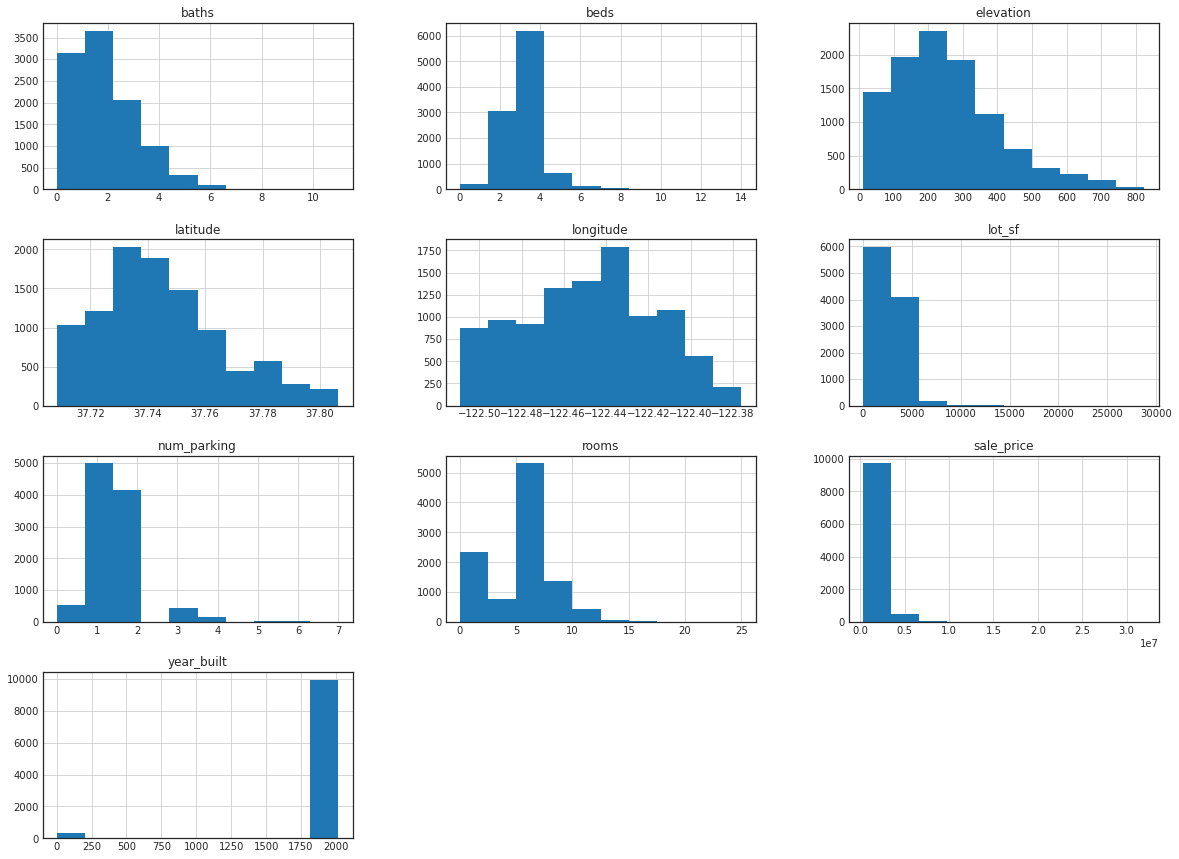

In [21]:
df.hist(figsize=(20,15))
plt.show()

We need to look at some features more granularly:

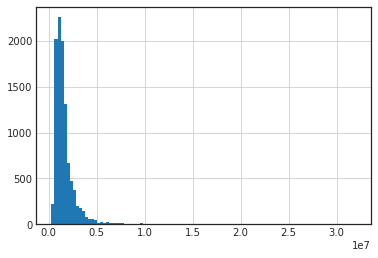

In [22]:
df['sale_price'].hist(bins=100)

In [23]:
df[df['sale_price'] == df['sale_price'].min()]

,longitude,latitude,elevation,subdist_desc,sale_price,rooms,baths,beds,lot_sf,year_built,num_parking
23210,-122.38213,37.737465,62.48,10 - Bayview,272070,5,2.0,2,1024,1992,1


In [24]:
df[df['sale_price'] == df['sale_price'].max()]

,longitude,latitude,elevation,subdist_desc,sale_price,rooms,baths,beds,lot_sf,year_built,num_parking
11652,-122.44497,37.793003,326.19,7 - Pacific Heights,32000000,0,6.0,5,5497,1924,0


In [25]:
df[df['year_built'] == df['year_built'].min()]

,longitude,latitude,elevation,subdist_desc,sale_price,rooms,baths,beds,lot_sf,year_built,num_parking
50,-122.50831,37.763880,32.26,2 - Outer Sunset,685000,0,2.00,3,1438,0,1
115,-122.50775,37.755940,27.24,2 - Outer Sunset,1035000,0,3.00,5,2996,0,2
148,-122.50744,37.751217,25.46,2 - Outer Sunset,715000,0,1.00,2,1100,0,1
191,-122.50715,37.778020,240.02,1 - Outer Richmond,665000,5,1.00,2,644,0,0
255,-122.50672,37.772010,55.59,1 - Outer Richmond,1035000,0,1.00,2,2996,0,1
...,...,...,...,...,...,...,...,...,...,...,...
23591,NaN,NaN,NaN,6 - Lower Pacific Height,1488000,0,4.50,4,2101,0,0
23640,NaN,NaN,NaN,5 - Cole Valley/Parnassu,1550000,0,1.00,1,2988,0,2
23663,NaN,NaN,NaN,4 - Monterey Heights,1607000,0,1.25,3,4875,0,2
23686,NaN,NaN,NaN,4 - Forest Hill Extensio,1386000,0,2.00,3,3158,0,2


Seems like some of the houses are missing year_built data. We can either dispose those data points or fill them.
Here I will just drop them, and leave another way as excercise

<font color=red> ***After-class excercise: fill year_built with mean or median data***</font>

In [26]:
df = df[df['year_built'] > 0 ]

In [27]:
df[df['year_built'] == df['year_built'].min()]

,longitude,latitude,elevation,subdist_desc,sale_price,rooms,baths,beds,lot_sf,year_built,num_parking
22749,-122.389366,37.734035,94.34,10 - Bayview,950000,7,1.0,3,5000,1852,3


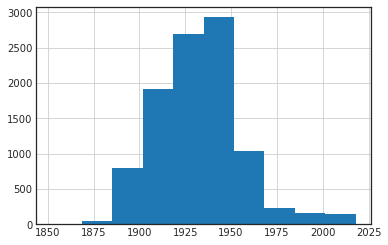

In [28]:
df['year_built'].hist()

In [29]:
df['HouseAge'] = 2021 - df['year_built']
df.drop(['year_built'], axis=1, inplace= True)
df

<ipython-input-29-3cb57f45b0d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HouseAge'] = 2021 - df['year_built']
/home/wrk1231/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,longitude,latitude,elevation,subdist_desc,sale_price,rooms,baths,beds,lot_sf,num_parking,HouseAge
1,-122.50929,37.762608,23.21,2 - Outer Sunset,1075000,9,3.0,4,3000,1,74
2,-122.50929,37.762608,23.21,2 - Outer Sunset,1525000,9,5.0,5,3000,1,74
5,-122.50919,37.776695,175.89,1 - Outer Richmond,3310000,8,4.0,4,3959,3,70
7,-122.50909,37.759580,23.45,2 - Outer Sunset,1304000,0,2.0,3,2639,1,121
8,-122.50908,37.759480,23.57,2 - Outer Sunset,1303000,5,2.0,3,2996,1,121
...,...,...,...,...,...,...,...,...,...,...,...
23697,NaN,NaN,NaN,10 - Bayview,790000,7,3.0,3,2495,1,80
23698,NaN,NaN,NaN,10 - Bayview,750000,0,1.0,3,2495,1,97
23699,NaN,NaN,NaN,10 - Bayview,700000,6,1.5,3,2495,2,82
23702,NaN,NaN,NaN,10 - Excelsior,935000,7,2.0,3,2495,1,73


##### We can have a look at internal correlations between different features by scatter plotting them:

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["sale_price", "rooms", "baths",
              "beds", "lot_sf", "num_parking", "HouseAge"]
scatter_matrix(df[attributes], figsize=(20, 16));

Obviously, we can see some positive correlation between price and lot_sf, baths, rooms, etc.

In [ ]:
df.plot(kind="scatter", x="sale_price", y="lot_sf",
             alpha=0.1, figsize=(12, 10))

In [ ]:
df.plot(kind="scatter", x="sale_price", y="baths",
             alpha=0.1, figsize=(12, 10))

##### We can also have a look at their correlation matrix and then sort the values, need to understand it clearly, not all of them are meaningful:

In [ ]:
corr_matrix = df.corr()
corr_matrix

In [ ]:
corr_matrix["sale_price"].sort_values(ascending=False)

Can you try to explain all of those relationships?

### 3. Feature engineering for ML algorithms

To be brief, feature engineering is a process which translates some representation that computer or program has difficulty to understand into something easy for them to digest.

Actually the process we translate year_built to HouseAge is already a kind of feature engineering.

We noticed that (longitude, latitude, elevation) can represent location. As common sense, exact location will not matter too much in pricing the houses. What really matters is the relative location or neighbour hood.

In [ ]:
df.drop(['longitude', 'latitude',  'elevation'], axis=1, inplace=True)

In [ ]:
np.sort(df['subdist_desc'].unique())

So in the dataset, we already have tags for different locations. By conducting research on San Francisco map, we find that each number represents a larger area and the following name is a more details area. For simplicity, we will only consider the larger region.

In [ ]:
df['subdist_desc'] = df['subdist_desc'].apply(lambda s: s.split()[0])

In [ ]:
region_label = df[['subdist_desc']]
region_label

Since all of them are labeled under numbers, we need to use another way of encoding to eliminate the affect of numerical values.

In [ ]:
from sklearn.preprocessing import  OneHotEncoder

In [ ]:
cat_encoder = OneHotEncoder(sparse=False)
region_1hot = cat_encoder.fit_transform(region_label)
region_1hot

In [ ]:
cat_encoder.categories_

In [ ]:
df.drop(['subdist_desc'], axis=1, inplace=True)
df

In [ ]:
df.values.shape

In [ ]:
fulldata = np.c_[df.values, region_1hot]

In [ ]:
np.c_[df.values, region_1hot].shape

### 4. Pick ML model and train it -- today we use simple linear model as example

***Split training and testing data sets:***

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(fulldata, test_size=0.2, random_state=42)

In [ ]:
train_target = train_set[:, 0]
train_target = train_target.reshape(len(train_target),-1)
train_target

In [ ]:
train_features = train_set[:, 1:]
train_features

In [ ]:
test_target = test_set[:, 0]
test_target = test_target.reshape(len(test_target),-1)
test_features = test_set[:, 1:]

In [ ]:
train_target.shape, train_features.shape

In [ ]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(train_features, train_target)

In [ ]:
regression.coef_

In [ ]:
regression.intercept_

***Then we need to evaluate the performance of the model on training and testing sets:***

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
price_predictions_on_train = regression.predict(train_features)
mse = mean_squared_error(train_target, price_predictions_on_train)
sqrtmse = np.sqrt(mse)
sqrtmse

In [ ]:
price_predictions_on_test = regression.predict(test_features)
mse = mean_squared_error(test_target, price_predictions_on_test)
sqrtmse = np.sqrt(mse)
sqrtmse